# Example working with EMIT over Libya-4

EMIT_L1B_RAD_001_20220827T091626_2223906_009

comparable to Fig 23 in Thompson et al. (2023)

In [1]:
import hyperquest

from spectral import *
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# Define path to envi image header file
hdr_path = '/Users/brent/Code/HyperQuest/tests/data/SISTER_EMIT_L1B_RDN_20220827T091626_000.hdr'
img_path = '/Users/brent/Code/HyperQuest/tests/data/SISTER_EMIT_L1B_RDN_20220827T091626_000.bin'

# get wavelengths
wavelengths = hyperquest.read_center_wavelengths(hdr_path)

wavelengths


array([ 381.00558472,  388.40921021,  395.81582642,  403.22540283,
        410.63800049,  418.05358887,  425.47213745,  432.8927002 ,
        440.31726074,  447.74279785,  455.17034912,  462.59887695,
        470.03039551,  477.46292114,  484.89743042,  492.33291626,
        499.77142334,  507.2098999 ,  514.65039062,  522.09088135,
        529.5333252 ,  536.97680664,  544.42126465,  551.86669922,
        559.31420898,  566.76159668,  574.20904541,  581.6585083 ,
        589.10797119,  596.55834961,  604.00982666,  611.46221924,
        618.91461182,  626.36804199,  633.82147217,  641.27587891,
        648.73028564,  656.18572998,  663.64111328,  671.09753418,
        678.55389404,  686.01031494,  693.4677124 ,  700.92510986,
        708.38354492,  715.84094238,  723.29931641,  730.75872803,
        738.21710205,  745.67651367,  753.13592529,  760.59631348,
        768.0557251 ,  775.51611328,  782.97753906,  790.43792725,
        797.89935303,  805.36175537,  812.82318115,  820.28460

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9999.0..1.0].


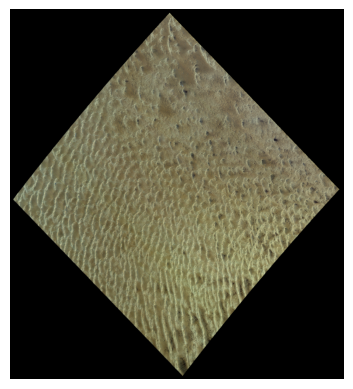

In [3]:

# Load raster
img_path = hyperquest.get_img_path_from_hdr(hdr_path)
array = np.array(envi.open(hdr_path, img_path).load(), dtype=np.float64)
red = array[:,:,38]
blue = array[:,:,11]
green = array[:,:,24]

red= np.ma.masked_equal(red, -9999)
green = np.ma.masked_equal(green, -9999)
blue = np.ma.masked_equal(blue, -9999)

# Normalize the values for display
red_normalized = (red - red.min()) / (red.max() - red.min())
green_normalized = (green - green.min()) / (green.max() - green.min())
blue_normalized = (blue - blue.min()) / (blue.max() - blue.min())
rgb_image = np.dstack((red_normalized, green_normalized, blue_normalized))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-81053.44534497899..87878.01176996787].


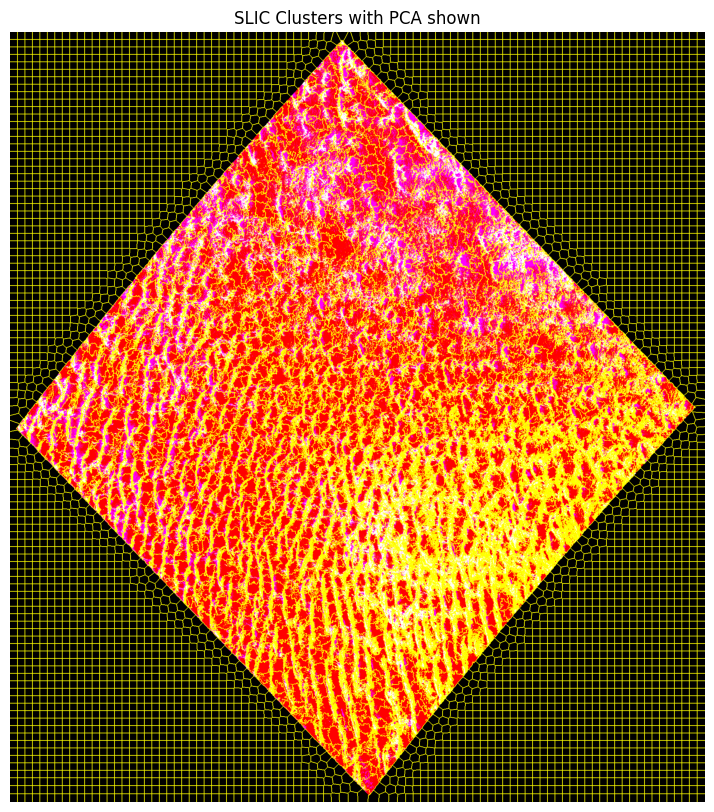

In [4]:
# Load raster
img_path = hyperquest.get_img_path_from_hdr(hdr_path)
array = np.array(envi.open(hdr_path, img_path).load(), dtype=np.float64)

# first 3 components
pca = PCA(n_components=3)
rows, cols, bands = array.shape
array_reshaped = array.reshape(-1, bands)
array_pca = pca.fit_transform(array_reshaped).reshape(rows, cols, -1)

# SLIC
n_segments = 10000
compactness = 0.001


segments = slic(array_pca, 
                n_segments=n_segments, 
                compactness=compactness)


plt.figure(figsize=(10, 10))
plt.imshow(mark_boundaries(array_pca, segments))
plt.title("SLIC Clusters with PCA shown")
plt.axis("off")
plt.show()

In [5]:
# compute using HRDSDC method
snr_hrdsdc = hyperquest.hrdsdc(hdr_path, 
                               n_segments = n_segments, 
                               compactness = compactness, 
                               n_pca = 3, 
                               ncpus = 8)


snr_hrdsdc

/Users/brent/Code/HyperQuest/myenv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


array([         nan, 405.36494149, 427.51753913, 485.29826893,
       513.57719553, 528.07536992, 531.14481332, 548.9569053 ,
       587.14626248, 621.10058239, 642.93222843, 656.45177474,
       662.11311888, 676.87380198, 677.12226166, 689.01690946,
       704.68635946, 722.5016122 , 732.27751633, 757.06527039,
       784.85381931, 807.47383343, 828.55405915, 759.74861528,
       553.56096525, 544.1534146 , 580.83026289, 588.08637502,
       599.37619086, 618.50747526, 631.97642144, 626.15606848,
       633.98485096, 641.21213175, 643.72026023, 643.36386835,
       630.34631563, 588.83158284, 503.42457076, 569.67232222,
       693.27348788, 704.48735152, 745.44309164, 747.87492049,
       723.32282527, 738.30256996, 675.70324305, 753.2281944 ,
       828.11865996, 814.22976925, 740.61249761, 507.64230308,
       603.62615921, 807.61133853, 839.84298207, 863.48003359,
       872.73205043, 809.94392   , 720.95111144, 682.76145089,
       805.69798532, 836.49125628, 825.82090951, 795.33

In [6]:
# Compare the other methods
snr_ssdc = hyperquest.ssdc(hdr_path,
                           block_size=7,
                           nbins = 150,
                           ncpus = 8)



In [7]:
snr_rlsd = hyperquest.rlsd(hdr_path,
                           block_size=7,
                           nbins = 150,
                           ncpus = 8)

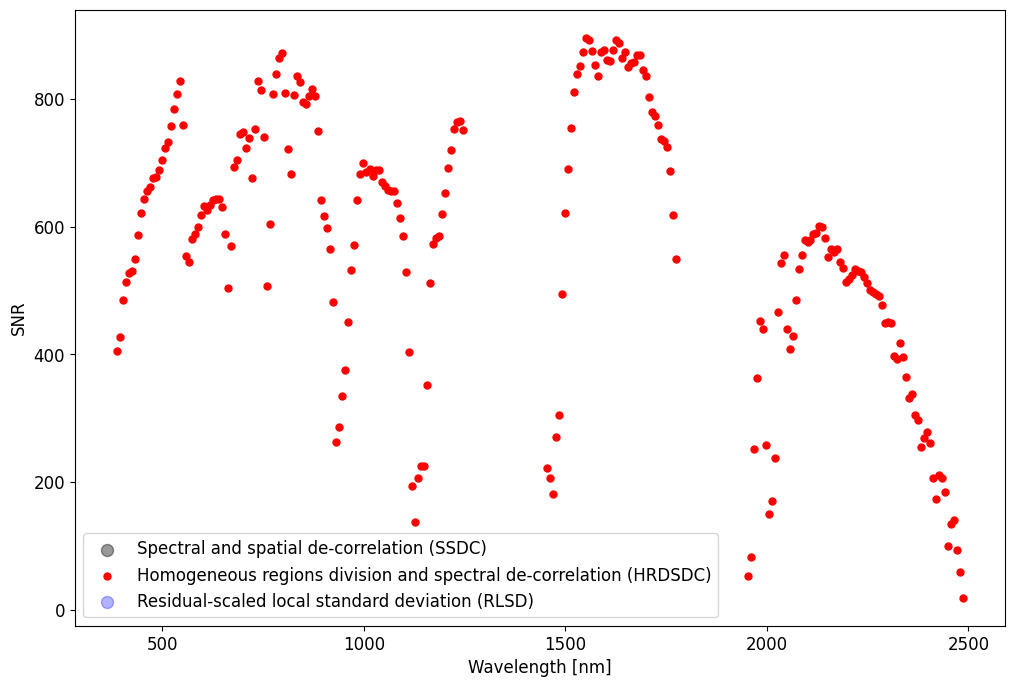

In [9]:
plt.figure(figsize= (12,8))
plt.rcParams.update({'font.size': 12})

plt.scatter(wavelengths, snr_ssdc, color='black', s=75, alpha=0.4)
plt.scatter(wavelengths, snr_hrdsdc, color='red', s=25, alpha=1.0)
plt.scatter(wavelengths, snr_rlsd, color = 'blue', s=75, alpha=0.3)


plt.legend(['Spectral and spatial de-correlation (SSDC)',
             'Homogeneous regions division and spectral de-correlation (HRDSDC)',
             'Residual-scaled local standard deviation (RLSD)'])

plt.xlabel('Wavelength [nm]')
plt.ylabel('SNR')

plt.show()

In [10]:
snr_ssdc

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na